<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/Lec8_Multivariate_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Revising ARCH(q) AND GARCH(p)**

1.Volatality modelling 

2.Univariate Modelling 

ARIMA says current return is related to past returns


ARIMA does not answer how current return is related to past return volatility 

Deviation of current retrun explained by deviation of past return 

ARCH gives how returns or erros are impacting current term 

GARCH component loosely represents the variance part (Beta)

ARCH coeff are called (Aplha)

alpha: How current return impacted by past return volatility ? 

beta: Level of persistence, it also measures volatility spillover

In [2]:
!pip install arch

     |████████████████████████████████| 798kB 3.0MB/s 


In [4]:
import pandas as pd
mydatats = pd.read_csv("oilpriceindex.csv", na_values=["null"], index_col='DATE', parse_dates= True, infer_datetime_format= True)

In [5]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [6]:
mydatats.WTI = mydatats.WTI.fillna(method='bfill')

In [7]:
mydatats["WTI_return"] = mydatats.WTI.pct_change(1)*100


#**Multivariate Time Series**

Modelling Causality

Endogenous variable is the Target Variable 


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sample_data
import statsmodels.tsa.stattools as staticmethod
import statsmodels.tsa.stattools as sts 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.api as sm

from matplotlib.pyplot import figure
sns.set()

In [12]:
mydata = pd.read_csv("/content/stockmarketindex.csv",
                     na_values = ["null"],
                     index_col = "Date",
                     parse_dates = True,
                     infer_datetime_format = True    
                     )

In [13]:
mydata.head()

,asi,his,nky,sti,sensex
Date,,,,,
15-05-2009,4075.65,2019.66,136.57,1540.10,224.85
16-05-2009,3955.57,1994.27,141.07,1539.52,223.01
17-05-2009,3961.92,2002.47,141.65,1546.77,222.40
18-05-2009,3935.97,2000.80,143.67,1541.34,220.43
19-05-2009,3892.94,2001.04,140.71,1541.21,225.57


In [16]:
sts.adfuller(mydata.asi)

(-2.568738812806987,
 0.09963196476676572,
 1,
 2837,
 {'1%': -3.432657094354157,
  '10%': -2.5673126119599647,
  '5%': -2.862559315261322},
 31376.531892318148)

In [17]:
sts.adfuller(mydata.sti)

(-2.2924522295175658,
 0.17441383444877678,
 20,
 2818,
 {'1%': -3.4326726638430176,
  '10%': -2.5673162728198173,
  '5%': -2.862566191457111},
 26008.38362326952)

In [18]:
sts.adfuller(mydata.nky)

(-1.200699489315211,
 0.6732947369284324,
 2,
 2836,
 {'1%': -3.432657908595214,
  '10%': -2.567312803413099,
  '5%': -2.8625596748681668},
 11345.276195531438)

In [19]:
sts.adfuller(mydata.sti)

(-2.2924522295175658,
 0.17441383444877678,
 20,
 2818,
 {'1%': -3.4326726638430176,
  '10%': -2.5673162728198173,
  '5%': -2.862566191457111},
 26008.38362326952)

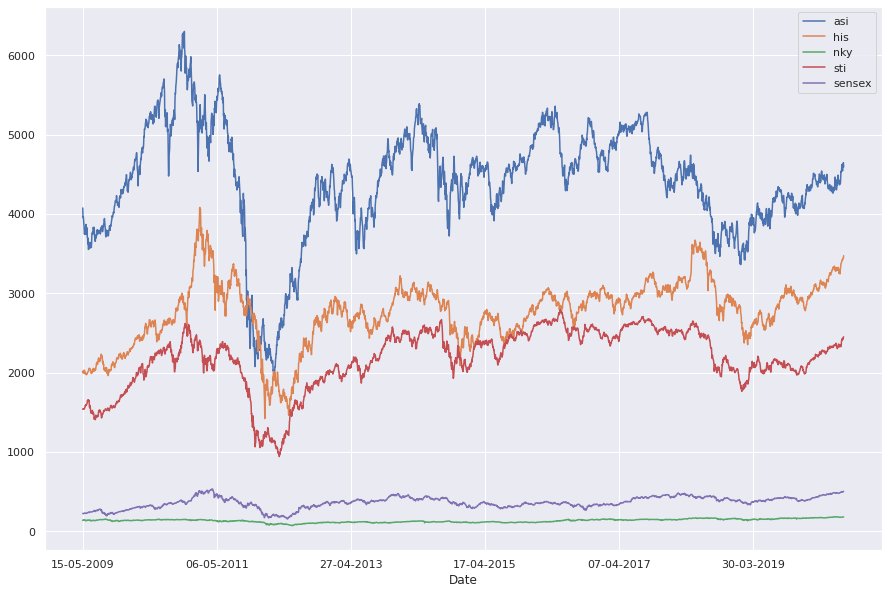

In [20]:
mydata.plot(figsize=(15,10))
plt.show()

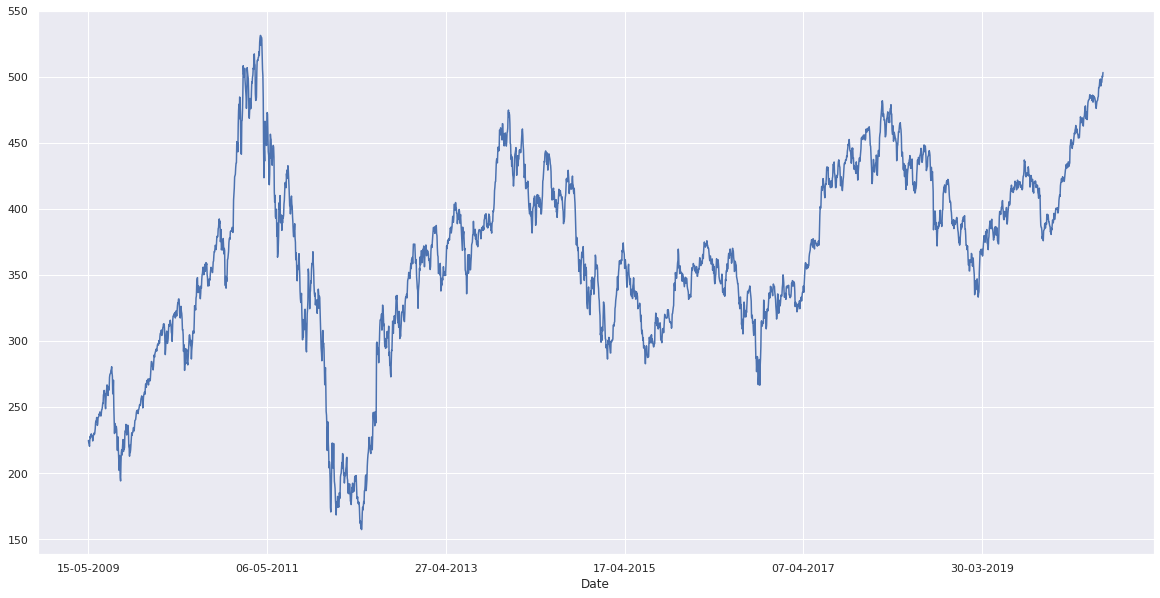

In [24]:
mydata.sensex.plot(figsize=(20,10))
plt.show()

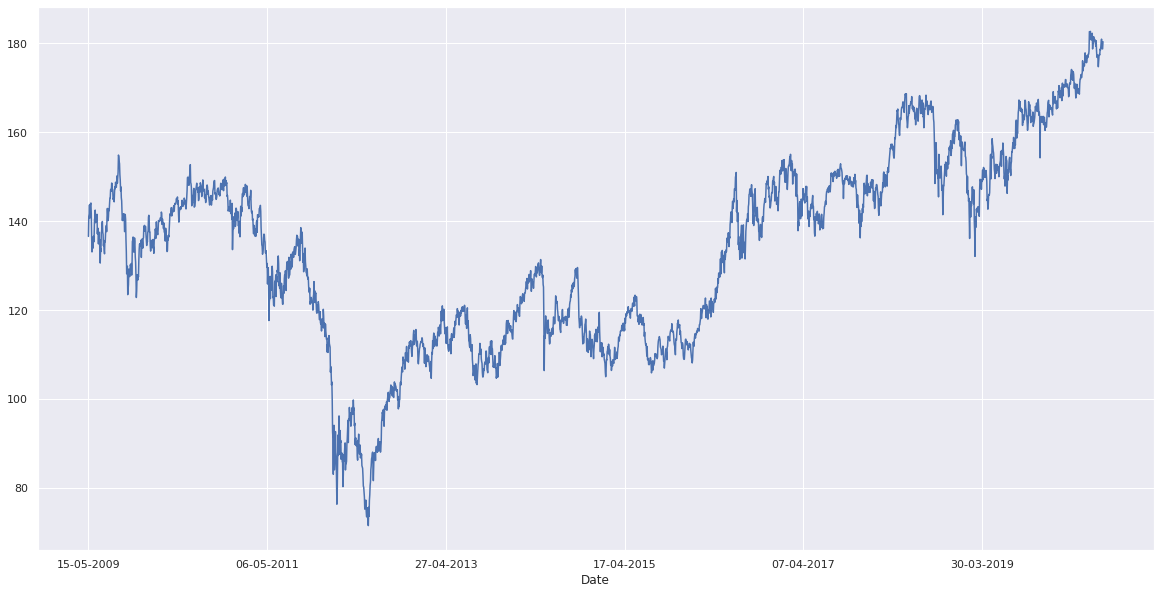

In [25]:
mydata.nky.plot(figsize=(20,10))
plt.show()

In [26]:
mydatadiff = mydata.diff().dropna()

In [27]:
mydatadiff.head()

,asi,his,nky,sti,sensex
Date,,,,,
16-05-2009,-120.08,-25.39,4.50,-0.58,-1.84
17-05-2009,6.35,8.20,0.58,7.25,-0.61
18-05-2009,-25.95,-1.67,2.02,-5.43,-1.97
19-05-2009,-43.03,0.24,-2.96,-0.13,5.14
22-05-2009,-59.59,29.87,2.75,-1.55,2.48


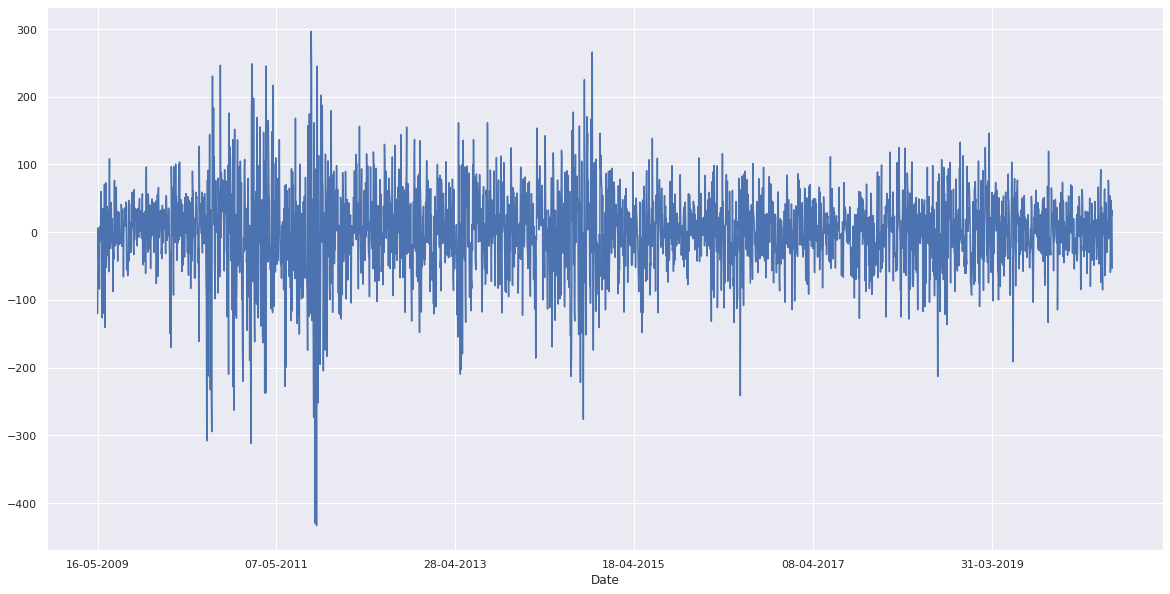

In [28]:
mydatadiff.asi.plot(figsize=(20,10))
plt.show()

high volality clustering and there are low volatility clustering 

volatility clustering has persistence 

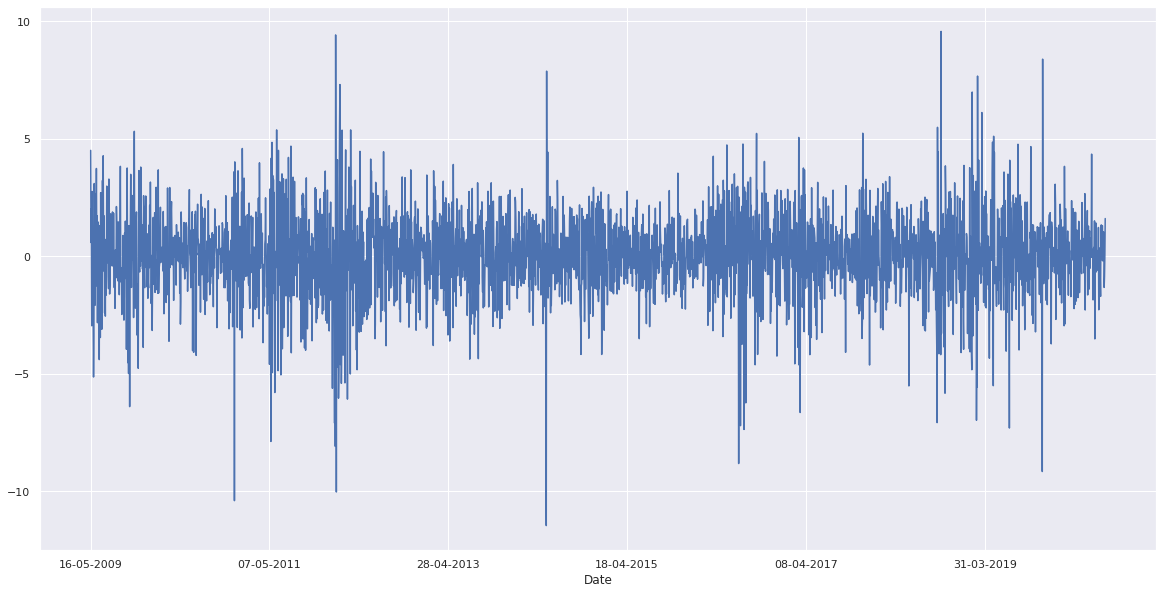

In [29]:
mydatadiff.nky.plot(figsize=(20,10))
plt.show()

Granger Causality 

In [30]:
from statsmodels.tsa.stattools import grangercausalitytests

In [36]:
grangercausalitytests(mydatadiff[["asi", "his"]], maxlag=15,\
                      addconst=True,\
                      verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.9527  , p=0.3290  , df=1
likelihood ratio test: chi2=0.9525  , p=0.3291  , df=1
parameter F test:         F=0.9517  , p=0.3294  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.9979  , p=0.6072  , df=2
likelihood ratio test: chi2=0.9978  , p=0.6072  , df=2
parameter F test:         F=0.4981  , p=0.6077  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=3.7794  , p=0.2863  , df=3
likelihood ratio test: chi2=3.7769  , p=0.2866  , df=3
parameter F test:         F=1.2567  , p=0.2876  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9918  , p=0.

{1: ({'lrtest': (0.952507739290013, 0.32908179427097395, 1),
   'params_ftest': (0.9516602536742429, 0.3293803139749294, 2834.0, 1.0),
   'ssr_chi2test': (0.9526676569067017, 0.3290411965082914, 1),
   'ssr_ftest': (0.9516602536741604, 0.3293803139749294, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.9977665025071474, 0.6072083804179771, 2),
   'params_ftest': (0.49809131140599816, 0.6077426881559386, 2831.0, 2.0),
   'ssr_chi2test': (0.9979420410802664, 0.6071550885103655, 2),
   'ssr_ftest': (0.49809131140659985, 0.6077426881555565, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (3.7769038931000978, 0.2865840492321026, 3),
   'params_ftest': (1.2566963269497904, 0.28760153865546584, 2828.0, 3.0),
   'ssr_chi2test': (3.779420884266988, 0.2862889184285111, 3),
   'ssr_ftest': (1.2566963269496818, 0.2876015386555178, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [ ]:
grangercausalitytests(mydatadiff[["his", "asi"]], maxlag=15,\
                      addconst=True,\
                      verbose=True)



if something is happening in asi and reflected his after 7 days
whereas if something happends in his, it is reflected in asi with immediate effect 

In [38]:
grangercausalitytests(mydatadiff[["nky", "sensex"]], maxlag=15,\
                      addconst=True,\
                      verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9691  , df_denom=2834, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9691  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9691  , df=1
parameter F test:         F=0.0015  , p=0.9691  , df_denom=2834, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0311  , p=0.9693  , df_denom=2831, df_num=2
ssr based chi2 test:   chi2=0.0624  , p=0.9693  , df=2
likelihood ratio test: chi2=0.0624  , p=0.9693  , df=2
parameter F test:         F=0.0311  , p=0.9693  , df_denom=2831, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1012  , p=0.3473  , df_denom=2828, df_num=3
ssr based chi2 test:   chi2=3.3117  , p=0.3460  , df=3
likelihood ratio test: chi2=3.3097  , p=0.3463  , df=3
parameter F test:         F=1.1012  , p=0.3473  , df_denom=2828, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8574  , p=0.

{1: ({'lrtest': (0.0015022380193840945, 0.9690827604224087, 1),
   'params_ftest': (0.0015006498672007515, 0.9691018277908823, 2834.0, 1.0),
   'ssr_chi2test': (0.0015022384153444881, 0.9690827563498607, 1),
   'ssr_ftest': (0.0015006498657336197, 0.9691018278070701, 2834.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.06238888130610576, 0.9692870859378532, 2),
   'params_ftest': (0.031139785921484267, 0.9693403955286357, 2831.0, 2.0),
   'ssr_chi2test': (0.06238956755470889, 0.9692867533519559, 2),
   'ssr_ftest': (0.03113978592161158, 0.9693403955286357, 2831.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (3.3097353602533985, 0.346289960703124, 3),
   'params_ftest': (1.1011637126157612, 0.3473439676003393, 2828.0, 3.0),
   'ssr_chi2test': (3.311668096109916, 0.3460219618986376, 3),
   'ssr_ftest': (1.101163712615972, 0.3473439676001262, 2828.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
   

In [ ]:
grangercausalitytests(mydatadiff[["sensex", "nky"]], maxlag=15,\
                      addconst=True,\
                      verbose=True)

These markets are related due to International Investors 

In [ ]:
grangercausalitytests(mydatadiff[["sensex", "sti"]], maxlag=15,\
                      addconst=True,\
                      verbose=True)

In [ ]:
grangercausalitytests(mydatadiff[["sti", "sensex"]], maxlag=15,\
                      addconst=True)